## 1. Keeping track of units

In the code example below, a function is defined that estimates the solar rotation rate in units of deg / h. 
1. Rewrite the function such that each quantity has a unit (using `astropy.units`) attached to it. The single test at the bottom should return the same value.
2. Using `astropy.units` functionality, write another test that returns the rotation rate at 90° in units of urad / s.

In [1]:
import numpy as np


def snodgrass_rate(lat, a0=-0.01413, a2=-0.343, a4=-0.474, 
                   plus_car_rot=False):
    """
    in: solar latitude (in deg)
    out: rotation-rate in deg/h
    
    If carrington rotation is desired, pass plus_car_rot=True
    """
    carrington_rotation = 2.86513  # in urad/s
    
    lat = np.deg2rad(lat)
    
    if plus_car_rot is True:
        a0 += carrington_rotation
        
    return np.rad2deg(a0 + a2*(np.sin(lat)**2) + a4*(np.sin(lat)**4))*1e-6*3600


if __name__ == '__main__':
    lat = 90
    print('Rotation rate at 90°: %s deg / h' % snodgrass_rate(lat))

Rotation rate at 90°: -0.1714328684161492 deg / h


In [2]:
import numpy as np
import astropy.units as u


def snodgrass_rate(lat, a0=-0.01413, a2=-0.343, a4=-0.474, 
                   plus_car_rot=False):
    """
    in: solar latitude (in deg)
    out: rotation-rate in deg/h
    
    If carrington rotation is desired, pass plus_car_rot=True
    """
    carrington_rotation = 2.86513 * u.urad / u.s
    
    lat = lat.to('rad')
    
    a0, a2, a4 = (a0, a2, a4) * u.urad / u.s
    
    if plus_car_rot is True:
        a0 = carrington_rotation + a0
    
    res = a0 + a2*(np.sin(lat)**2) + a4*(np.sin(lat)**4)
    return res.to('deg/h')


if __name__ == '__main__':
    lat = 90*u.deg
    print('Rotation rate at 90°: %s' % snodgrass_rate(lat))
    print('Rotation rate at 90°: %s' % snodgrass_rate(lat).to('urad/s'))

Rotation rate at 90°: -0.17143286841614916 deg / h
Rotation rate at 90°: -0.8311299999999998 urad / s


## 2. Generating a custom SunPy map from a numpy array

Follow these steps to create a custom SunPy map, starting with the array `data`:
1. Create a `SkyCoord` instance. For the x, y coordinates, use arcseconds and place them at the origin. For the observation use the time `'2013-10-28 08:24'` and as the observer `'earth'`. As coordinate-frame, use helioprojective system (`frames.Helioprojective`).
2. Create a header using the `sunpy.map.header_helper.make_fitswcs_header` function. As reference pixel use again the origin. The scale is 2 by 2 arcseconds per pixel. Be creative with some additional meta data (you can use your favorite instrument for example).
3. Create the `sunpy.map.Map` instace and briefly plot it.

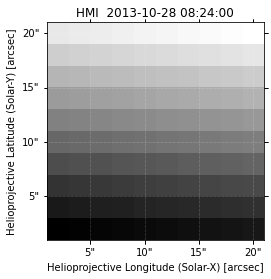

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import sunpy.map
from sunpy.coordinates import frames


data = np.arange(0, 100).reshape(10 ,10)

coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2013-10-28 08:24', 
                observer='earth', frame=frames.Helioprojective)

header = sunpy.map.header_helper.make_fitswcs_header(data, coord, 
            reference_pixel=[0, 0]*u.pixel, scale=[2, 2]*u.arcsec/u.pixel, 
            telescope='SDO', instrument='HMI', wavelength=6173*u.angstrom)

manual_map = sunpy.map.Map(data, header)

fig = plt.figure()
manual_map.plot()

## 3. Creating a power spectrum using the TimeSeries class

Follow these steps to create a custom SunPy map, starting with the array `data`:
1. Create an `sunpy.timeseries.TimeSeries` using `data` as data.
2. Choose the first channel (3 - 6 keV) and create a spectrum from it. You can use the function `scipy.signal.periodogram()` to estimate the spectrum (the sampling rate is 0.25 Hz).
3. Plot the result with a logarithmic y-axis.

Text(0.5, 0, 'Frequency [Hz]')

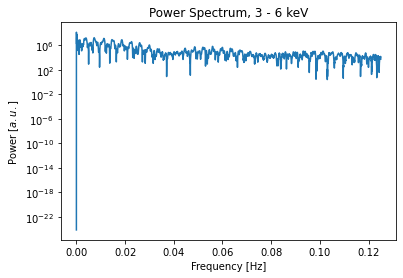

In [4]:
import matplotlib.pyplot as plt
from scipy import signal
import astropy.units as u
import sunpy.timeseries
from sunpy.data.sample import RHESSI_TIMESERIES


data = RHESSI_TIMESERIES

ts = sunpy.timeseries.TimeSeries(data)

x_ray = ts.columns[0]
freq, spectra = signal.periodogram(ts.quantity(x_ray), fs=1/4)

plt.semilogy(freq, spectra)
plt.title('Power Spectrum, %s' % x_ray)
plt.ylabel('Power [$a.u.$]')
plt.xlabel('Frequency [Hz]')